# Name: Dhairya Singla
## Date: 08-06-2023
### Exploratory Data Analysis on Olympics Dataset using Plotly

In [9]:
import numpy as np 
import pandas as pd
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

%matplotlib inline
pyo.init_notebook_mode()

In [10]:
df = pd.read_csv('athlete_events.csv')
df.head(10)

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   
5   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   
6   5  Christine Jacoba Aaftink   F  25.0   185.0    82.0     Netherlands   
7   5  Christine Jacoba Aaftink   F  25.0   185.0    82.0     Netherlands   
8   5  Christine Jacoba Aaftink   F  27.0   185.0    82.0     Netherlands   
9   5  Christine Jacoba Aaftink   F  27.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season         City          Sport  \
0  CHN  1992 Summer  1992  Summer    Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer       London           Judo   
2  DEN  1920 Summer  1920  Summer    Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer        Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter      Calgary  Speed Skating   
5  NED  1988 Winter  1988  Winter      Calgary  Speed Skating   
6  NED  1992 Winter  1992  Winter  Albertville  Speed Skating   
7  NED  1992 Winter  1992  Winter  Albertville  Speed Skating   
8  NED  1994 Winter  1994  Winter  Lillehammer  Speed Skating   
9  NED  1994 Winter  1994  Winter  Lillehammer  Speed Skating   

                                Event Medal  
0         Basketball Men's Basketball   NaN  
1        Judo Men's Extra-Lightweight   NaN  
2             Football Men's Football   NaN  
3         Tug-Of-War Men's Tug-Of-War  Gold  
4    Speed Skating Women's 500 metres   NaN  
5  Speed Skating Women's 1,000 metres   NaN  
6    Speed Skating Women's 500 metres   NaN  
7  Speed Skating Women's 1,000 metres   NaN  
8    Speed Skating Women's 500 metres   NaN  
9  Speed Skating Women's 1,000 metres   NaN

In [11]:
region_df = pd.read_csv('noc_regions.csv')
region_df.head(10)

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN
5  ANG       Angola                   NaN
6  ANT      Antigua   Antigua and Barbuda
7  ANZ    Australia           Australasia
8  ARG    Argentina                   NaN
9  ARM      Armenia                   NaN

In [12]:
print('Rows in dataframe containing information related to athletes:',df.shape[0])
print('Columns in dataframe containing information related to athletes:',df.shape[1])

Rows in dataframe containing information related to athletes: 271116
Columns in dataframe containing information related to athletes: 15


In [13]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [14]:
df.drop(columns=['ID'],inplace=True)
df

Name Sex   Age  Height  Weight            Team  \
0                      A Dijiang   M  24.0   180.0    80.0           China   
1                       A Lamusi   M  23.0   170.0    60.0           China   
2            Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3           Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4       Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   
...                          ...  ..   ...     ...     ...             ...   
271111                Andrzej ya   M  29.0   179.0    89.0        Poland-1   
271112                  Piotr ya   M  27.0   176.0    59.0          Poland   
271113                  Piotr ya   M  27.0   176.0    59.0          Poland   
271114        Tomasz Ireneusz ya   M  30.0   185.0    96.0          Poland   
271115        Tomasz Ireneusz ya   M  34.0   185.0    96.0          Poland   

        NOC        Games  Year  Season            City          Sport  \
0       CHN  1992 Summer  1992  Summer       Barcelona     Basketball   
1       CHN  2012 Summer  2012  Summer          London           Judo   
2       DEN  1920 Summer  1920  Summer       Antwerpen       Football   
3       DEN  1900 Summer  1900  Summer           Paris     Tug-Of-War   
4       NED  1988 Winter  1988  Winter         Calgary  Speed Skating   
...     ...          ...   ...     ...             ...            ...   
271111  POL  1976 Winter  1976  Winter       Innsbruck           Luge   
271112  POL  2014 Winter  2014  Winter           Sochi    Ski Jumping   
271113  POL  2014 Winter  2014  Winter           Sochi    Ski Jumping   
271114  POL  1998 Winter  1998  Winter          Nagano      Bobsleigh   
271115  POL  2002 Winter  2002  Winter  Salt Lake City      Bobsleigh   

                                           Event Medal  
0                    Basketball Men's Basketball   NaN  
1                   Judo Men's Extra-Lightweight   NaN  
2                        Football Men's Football   NaN  
3                    Tug-Of-War Men's Tug-Of-War  Gold  
4               Speed Skating Women's 500 metres   NaN  
...                                          ...   ...  
271111                Luge Mixed (Men)'s Doubles   NaN  
271112  Ski Jumping Men's Large Hill, Individual   NaN  
271113        Ski Jumping Men's Large Hill, Team   NaN  
271114                      Bobsleigh Men's Four   NaN  
271115                      Bobsleigh Men's Four   NaN  

[271116 rows x 14 columns]

In [18]:
df = df[df['Season'] == 'Summer']
df

Name Sex   Age  Height  Weight  \
0                                A Dijiang   M  24.0   180.0    80.0   
1                                 A Lamusi   M  23.0   170.0    60.0   
2                      Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3                     Edgar Lindenau Aabye   M  34.0     NaN     NaN   
26      Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...                                    ...  ..   ...     ...     ...   
271106            Fernando scar Zylberberg   M  27.0   168.0    76.0   
271107          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
271108        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
271109        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
271110              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
26         Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
271106       Argentina  ARG  2004 Summer  2004  Summer          Athina   
271107   United States  USA  1972 Summer  1972  Summer          Munich   
271108          Russia  RUS  2000 Summer  2000  Summer          Sydney   
271109          Russia  RUS  2004 Summer  2004  Summer          Athina   
271110         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal  
0       Basketball             Basketball Men's Basketball   NaN  
1             Judo            Judo Men's Extra-Lightweight   NaN  
2         Football                 Football Men's Football   NaN  
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War  Gold  
26       Athletics            Athletics Women's 100 metres   NaN  
...            ...                                     ...   ...  
271106      Hockey                     Hockey Men's Hockey   NaN  
271107    Football                 Football Men's Football   NaN  
271108      Rowing  Rowing Men's Lightweight Coxless Fours   NaN  
271109      Rowing  Rowing Men's Lightweight Coxless Fours   NaN  
271110  Basketball           Basketball Women's Basketball   NaN  

[222552 rows x 14 columns]

In [19]:
print('Rows after filtering the dataframe containing information related to athletes:',df.shape[0])
print('Columns after filtering the dataframe containing information related to athletes:',df.shape[1])

Rows after filtering the dataframe containing information related to athletes: 222552
Columns after filtering the dataframe containing information related to athletes: 14


In [20]:
region_df.columns

Index(['NOC', 'region', 'notes'], dtype='object')

In [21]:
df = df.merge(region_df,on='NOC',how='left')
df

Name Sex   Age  Height  Weight  \
0                                A Dijiang   M  24.0   180.0    80.0   
1                                 A Lamusi   M  23.0   170.0    60.0   
2                      Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3                     Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4       Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...                                    ...  ..   ...     ...     ...   
222547            Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222547       Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550          Russia  RUS  2004 Summer  2004  Summer          Athina   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal       region  \
0       Basketball             Basketball Men's Basketball   NaN        China   
1             Judo            Judo Men's Extra-Lightweight   NaN        China   
2         Football                 Football Men's Football   NaN      Denmark   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War  Gold      Denmark   
4        Athletics            Athletics Women's 100 metres   NaN  Netherlands   
...            ...                                     ...   ...          ...   
222547      Hockey                     Hockey Men's Hockey   NaN    Argentina   
222548    Football                 Football Men's Football   NaN          USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222551  Basketball           Basketball Women's Basketball   NaN      Belarus   

       notes  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
222547   NaN  
222548   NaN  
222549   NaN  
222550   NaN  
222551   NaN  

[222552 rows x 16 columns]

In [22]:
#Number of Countries that Participated in the Olympics

print('Countries that participated in olympics are; ',df['region'].unique())

Countries that participated in olympics are;  ['China' 'Denmark' 'Netherlands' 'Finland' 'Norway' 'Romania' 'Estonia'
 'France' 'Morocco' 'Spain' 'Egypt' 'Iran' 'Bulgaria' 'Italy' 'Chad'
 'Azerbaijan' 'Sudan' 'Russia' 'Argentina' 'Cuba' 'Belarus' 'Greece'
 'Cameroon' 'Turkey' 'Chile' 'Mexico' 'USA' 'Nicaragua' 'Hungary'
 'Nigeria' 'Algeria' 'Kuwait' 'Bahrain' 'Pakistan' 'Iraq' 'Syria'
 'Lebanon' 'Qatar' 'Malaysia' 'Germany' 'Canada' 'Ireland' 'Australia'
 'South Africa' 'Eritrea' 'Tanzania' 'Jordan' 'Tunisia' 'Libya' 'Belgium'
 'Djibouti' 'Palestine' 'Comoros' 'Kazakhstan' 'Brunei' 'India'
 'Saudi Arabia' 'Maldives' 'Ethiopia' 'United Arab Emirates' 'Yemen'
 'Indonesia' 'Philippines' nan 'Uzbekistan' 'Kyrgyzstan' 'Tajikistan'
 'Japan' 'Republic of Congo' 'Switzerland' 'Brazil' 'Monaco' 'Israel'
 'Uruguay' 'Sweden' 'Sri Lanka' 'Armenia' 'Ivory Coast' 'Kenya' 'Benin'
 'UK' 'Ghana' 'Somalia' 'Niger' 'Mali' 'Afghanistan' 'Poland' 'Costa Rica'
 'Panama' 'Georgia' 'Slovenia' 'Guyana' 'New Ze

In [23]:
print('Total number of countries that have participated in olympics:',df['region'].nunique())

Total number of countries that have participated in olympics: 205


In [24]:
#Total Number of Null Values
df.isna().sum()

Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [27]:
#Checking the duplicated values in the dataframe
df.duplicated().sum()

1385

In [28]:
##### Removing the duplicate values from the dataframe
df.drop_duplicates(inplace=True)

In [29]:
#Checking total number of duplicated values after removing them. As the output of the below block of code is 0 we can easily conclude that all the duplicate values are removed from the dataframe.
df.duplicated().sum()

0

In [30]:
#Which medals are present and what is the total quantity of each one of them?
df['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [31]:
df['Medal'].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [32]:
#As we know that Medals is a categorical column we can get separate columns of Gold, Silver and Bronze from it. In order to do this we can use get_dummies method of pandas and thereby we can concatenate that output along with our original dataframe.
df = pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)
df

Name Sex   Age  Height  Weight  \
0                                A Dijiang   M  24.0   180.0    80.0   
1                                 A Lamusi   M  23.0   170.0    60.0   
2                      Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3                     Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4       Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...                                    ...  ..   ...     ...     ...   
222547            Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222547       Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550          Russia  RUS  2004 Summer  2004  Summer          Athina   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal       region  \
0       Basketball             Basketball Men's Basketball   NaN        China   
1             Judo            Judo Men's Extra-Lightweight   NaN        China   
2         Football                 Football Men's Football   NaN      Denmark   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War  Gold      Denmark   
4        Athletics            Athletics Women's 100 metres   NaN  Netherlands   
...            ...                                     ...   ...          ...   
222547      Hockey                     Hockey Men's Hockey   NaN    Argentina   
222548    Football                 Football Men's Football   NaN          USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222551  Basketball           Basketball Women's Basketball   NaN      Belarus   

       notes  Bronze  Gold  Silver  
0        NaN       0     0       0  
1        NaN       0     0       0  
2        NaN       0     0       0  
3        NaN       0     1       0  
4        NaN       0     0       0  
...      ...     ...   ...     ...  
222547   NaN       0     0       0  
222548   NaN       0     0       0  
222549   NaN       0     0       0  
222550   NaN       0     0       0  
222551   NaN       0     0       0  

[221167 rows x 19 columns]

In [33]:
#Now, we need to compute that which country has won how many medals for each medal category.
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

NOC    Gold  Silver  Bronze
0    USA  2472.0  1333.0  1197.0
1    URS   832.0   635.0   596.0
2    GBR   635.0   729.0   620.0
3    GER   592.0   538.0   649.0
4    ITA   518.0   474.0   454.0
..   ...     ...     ...     ...
225  AHO     0.0     1.0     0.0
226  LBR     0.0     0.0     0.0
227  LCA     0.0     0.0     0.0
228  LES     0.0     0.0     0.0
229  LBA     0.0     0.0     0.0

[230 rows x 4 columns]

In [34]:
df[(df['NOC'] == 'IND') & (df['Medal'] == 'Gold')]

Name Sex   Age  Height  Weight   Team  NOC  \
4186               Shaukat Ali   M  30.0     NaN     NaN  India  IND   
4190          Syed Mushtaq Ali   M  22.0   165.0    61.0  India  IND   
4460       Richard James Allen   M  25.0   172.0     NaN  India  IND   
4461       Richard James Allen   M  30.0   172.0     NaN  India  IND   
4462       Richard James Allen   M  34.0   172.0     NaN  India  IND   
...                        ...  ..   ...     ...     ...    ...  ...   
191759      Dung Dung Sylvanus   M  31.0   160.0    62.0  India  IND   
193964  Carlyle Carrol Tapsell   M  23.0   182.0     NaN  India  IND   
193965  Carlyle Carrol Tapsell   M  27.0   182.0     NaN  India  IND   
205949         Max "Maxie" Vaz   M   NaN     NaN     NaN  India  IND   
219336    Sayed Muhammad Yusuf   M   NaN     NaN     NaN  India  IND   

              Games  Year  Season         City   Sport                Event  \
4186    1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   
4190    1964 Summer  1964  Summer        Tokyo  Hockey  Hockey Men's Hockey   
4460    1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   
4461    1932 Summer  1932  Summer  Los Angeles  Hockey  Hockey Men's Hockey   
4462    1936 Summer  1936  Summer       Berlin  Hockey  Hockey Men's Hockey   
...             ...   ...     ...          ...     ...                  ...   
191759  1980 Summer  1980  Summer       Moskva  Hockey  Hockey Men's Hockey   
193964  1932 Summer  1932  Summer  Los Angeles  Hockey  Hockey Men's Hockey   
193965  1936 Summer  1936  Summer       Berlin  Hockey  Hockey Men's Hockey   
205949  1948 Summer  1948  Summer       London  Hockey  Hockey Men's Hockey   
219336  1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   

       Medal region notes  Bronze  Gold  Silver  
4186    Gold  India   NaN       0     1       0  
4190    Gold  India   NaN       0     1       0  
4460    Gold  India   NaN       0     1       0  
4461    Gold  India   NaN       0     1       0  
4462    Gold  India   NaN       0     1       0  
...      ...    ...   ...     ...   ...     ...  
191759  Gold  India   NaN       0     1       0  
193964  Gold  India   NaN       0     1       0  
193965  Gold  India   NaN       0     1       0  
205949  Gold  India   NaN       0     1       0  
219336  Gold  India   NaN       0     1       0  

[131 rows x 19 columns]

> From the above output dataframe, I searched on this [link](https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table). Here I found the difference in total number of medals won by countries given on the link and the output that I obtained.  

> Here the difference in values might be due to the following reason. Suppose there is a team game (Hockey) which consists of 11 players and the medal will be received by all the 11 players who are belonging to the same country. Hence we are calculating all the total 11 medals instead of 1 medal for that particular country due to which there are some misleading errors. Hence we can remove those duplicate values.

In [36]:
medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
medal_tally

Name Sex   Age  Height  Weight  \
0                                 A Dijiang   M  24.0   180.0    80.0   
1                                  A Lamusi   M  23.0   170.0    60.0   
2                       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3                      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4        Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...                                     ...  ..   ...     ...     ...   
222528  Galina Ivanovna Zybina (-Fyodorova)   F  25.0   168.0    80.0   
222530  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0    80.0   
222536           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222537           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222541                    Stavroula Zygouri   F  36.0   171.0    63.0   

                  Team  NOC        Games  Year  Season         City  \
0                China  CHN  1992 Summer  1992  Summer    Barcelona   
1                China  CHN  2012 Summer  2012  Summer       London   
2              Denmark  DEN  1920 Summer  1920  Summer    Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris   
4          Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   
...                ...  ...          ...   ...     ...          ...   
222528    Soviet Union  URS  1956 Summer  1956  Summer    Melbourne   
222530    Soviet Union  URS  1964 Summer  1964  Summer        Tokyo   
222536          Poland  POL  1980 Summer  1980  Summer       Moskva   
222537          Poland  POL  1980 Summer  1980  Summer       Moskva   
222541          Greece  GRE  2004 Summer  2004  Summer       Athina   

             Sport                                      Event   Medal  \
0       Basketball                Basketball Men's Basketball     NaN   
1             Judo               Judo Men's Extra-Lightweight     NaN   
2         Football                    Football Men's Football     NaN   
3       Tug-Of-War                Tug-Of-War Men's Tug-Of-War    Gold   
4        Athletics               Athletics Women's 100 metres     NaN   
...            ...                                        ...     ...   
222528   Athletics                 Athletics Women's Shot Put  Silver   
222530   Athletics                 Athletics Women's Shot Put  Bronze   
222536    Swimming        Swimming Men's 100 metres Butterfly     NaN   
222537    Swimming        Swimming Men's 200 metres Butterfly     NaN   
222541   Wrestling  Wrestling Women's Middleweight, Freestyle     NaN   

             region notes  Bronze  Gold  Silver  
0             China   NaN       0     0       0  
1             China   NaN       0     0       0  
2           Denmark   NaN       0     0       0  
3           Denmark   NaN       0     1       0  
4       Netherlands   NaN       0     0       0  
...             ...   ...     ...   ...     ...  
222528       Russia   NaN       0     0       1  
222530       Russia   NaN       1     0       0  
222536       Poland   NaN       0     0       0  
222537       Poland   NaN       0     0       0  
222541       Greece   NaN       0     0       0  

[105636 rows x 19 columns]

In [37]:
medal_tally = medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
medal_tally

region    Gold  Silver  Bronze
0              USA  1035.0   802.0   708.0
1           Russia   592.0   498.0   487.0
2          Germany   444.0   457.0   491.0
3               UK   278.0   317.0   300.0
4           France   234.0   256.0   287.0
..             ...     ...     ...     ...
200        Lesotho     0.0     0.0     0.0
201        Albania     0.0     0.0     0.0
202          Libya     0.0     0.0     0.0
203  Liechtenstein     0.0     0.0     0.0
204        Liberia     0.0     0.0     0.0

[205 rows x 4 columns]

> Now after checking on this [link](https://www.statista.com/statistics/262864/all-time-summer-olympics-medals-table/), I can conclude that there is minute difference in the total medals but our value is very much near to it. The code that I have written above is absolutely perfect and there might be some problems in the data.

In [38]:
medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']
medal_tally

region    Gold  Silver  Bronze   Total
0              USA  1035.0   802.0   708.0  2545.0
1           Russia   592.0   498.0   487.0  1577.0
2          Germany   444.0   457.0   491.0  1392.0
3               UK   278.0   317.0   300.0   895.0
4           France   234.0   256.0   287.0   777.0
..             ...     ...     ...     ...     ...
200        Lesotho     0.0     0.0     0.0     0.0
201        Albania     0.0     0.0     0.0     0.0
202          Libya     0.0     0.0     0.0     0.0
203  Liechtenstein     0.0     0.0     0.0     0.0
204        Liberia     0.0     0.0     0.0     0.0

[205 rows x 5 columns]

#### In how much different years was olympics held?

In [39]:
years = df['Year'].unique().tolist()
years.sort()
years

[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [40]:
df['Year'].nunique()

29

In [41]:
#How many different countries have participated in the olympics till now?
country = np.unique(df['region'].dropna().values).tolist()
country.sort()
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

## 2 - Overall Analysis and Calculation of Top Statistics

In [42]:
years.insert(0,'Overall')
country.insert(0,'Overall')

In [43]:
medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
medal_df

Name Sex   Age  Height  Weight  \
0                                 A Dijiang   M  24.0   180.0    80.0   
1                                  A Lamusi   M  23.0   170.0    60.0   
2                       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3                      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4        Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...                                     ...  ..   ...     ...     ...   
222528  Galina Ivanovna Zybina (-Fyodorova)   F  25.0   168.0    80.0   
222530  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0    80.0   
222536           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222537           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222541                    Stavroula Zygouri   F  36.0   171.0    63.0   

                  Team  NOC        Games  Year  Season         City  \
0                China  CHN  1992 Summer  1992  Summer    Barcelona   
1                China  CHN  2012 Summer  2012  Summer       London   
2              Denmark  DEN  1920 Summer  1920  Summer    Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris   
4          Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   
...                ...  ...          ...   ...     ...          ...   
222528    Soviet Union  URS  1956 Summer  1956  Summer    Melbourne   
222530    Soviet Union  URS  1964 Summer  1964  Summer        Tokyo   
222536          Poland  POL  1980 Summer  1980  Summer       Moskva   
222537          Poland  POL  1980 Summer  1980  Summer       Moskva   
222541          Greece  GRE  2004 Summer  2004  Summer       Athina   

             Sport                                      Event   Medal  \
0       Basketball                Basketball Men's Basketball     NaN   
1             Judo               Judo Men's Extra-Lightweight     NaN   
2         Football                    Football Men's Football     NaN   
3       Tug-Of-War                Tug-Of-War Men's Tug-Of-War    Gold   
4        Athletics               Athletics Women's 100 metres     NaN   
...            ...                                        ...     ...   
222528   Athletics                 Athletics Women's Shot Put  Silver   
222530   Athletics                 Athletics Women's Shot Put  Bronze   
222536    Swimming        Swimming Men's 100 metres Butterfly     NaN   
222537    Swimming        Swimming Men's 200 metres Butterfly     NaN   
222541   Wrestling  Wrestling Women's Middleweight, Freestyle     NaN   

             region notes  Bronze  Gold  Silver  
0             China   NaN       0     0       0  
1             China   NaN       0     0       0  
2           Denmark   NaN       0     0       0  
3           Denmark   NaN       0     1       0  
4       Netherlands   NaN       0     0       0  
...             ...   ...     ...   ...     ...  
222528       Russia   NaN       0     0       1  
222530       Russia   NaN       1     0       0  
222536       Poland   NaN       0     0       0  
222537       Poland   NaN       0     0       0  
222541       Greece   NaN       0     0       0  

[105636 rows x 19 columns]

In [44]:
# Function for fetching the medal tally of any country in any year.
def fetch_medal_tally(year,country):
    
    flag = 0
    
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
        
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
        
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
        
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == year) & (medal_df['region'] == country)]
        
    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
    
    x['Total'] = x['Gold'] + x['Silver'] + x['Bronze']
    print(x)

In [45]:
print('Analysis of medals won by India in 1900')
fetch_medal_tally(1900,'India')

print('\n')

print("Overall Analysis of the countries")
fetch_medal_tally('Overall','Overall')

print('\n')

print("Overall Analysis of India in each and every year")
fetch_medal_tally('Overall','India')

print('\n')

print('Analysis of all the countries in 1900')
fetch_medal_tally(1900,'Overall')

Analysis of medals won by India in 1900
  region  Gold  Silver  Bronze  Total
0  India     0       2       0      2


Overall Analysis of the countries
            region    Gold  Silver  Bronze   Total
0              USA  1035.0   802.0   708.0  2545.0
1           Russia   592.0   498.0   487.0  1577.0
2          Germany   444.0   457.0   491.0  1392.0
3               UK   278.0   317.0   300.0   895.0
4           France   234.0   256.0   287.0   777.0
..             ...     ...     ...     ...     ...
200        Lesotho     0.0     0.0     0.0     0.0
201        Albania     0.0     0.0     0.0     0.0
202          Libya     0.0     0.0     0.0     0.0
203  Liechtenstein     0.0     0.0     0.0     0.0
204        Liberia     0.0     0.0     0.0     0.0

[205 rows x 5 columns]


Overall Analysis of India in each and every year
    Year  Gold  Silver  Bronze  Total
0   1900     0       2       0      2
1   1920     0       0       0      0
2   1924     0       0       0      0
3   1928 

#### Now, we will calculate some of the top statistics

In [32]:
df['Year'].nunique()

29

In [46]:
df['Year'].unique()

array([1992, 2012, 1920, 1900, 1932, 1952, 2000, 1996, 1912, 1924, 1948,
       2008, 2016, 2004, 1984, 1968, 1972, 1988, 1936, 1956, 1960, 1928,
       1976, 1980, 1964, 1906, 1904, 1908, 1896], dtype=int64)

####  Total number of olympics events are 28 but the above output shows that total number of olympic events are 29. As we know that olympics is being played after every 4 years but there was an exception. After 1904, the olympics was held in 1906 and the olympics of 1906 was not considered.

In [47]:
print('Total number of times olympic being held:',df['Year'].nunique() - 1)
print('Total number of cities which have participated till now:',df['City'].nunique())
print('Total number of different sports played till now:',df['Sport'].nunique())
print('Total number of events held in olympics held till now:',df['Event'].nunique())
print('Total number of athletes who have participated till now:',df['Name'].nunique())
print('Total number of regions who have participated',df['region'].nunique())

Total number of times olympic being held: 28
Total number of cities which have participated till now: 23
Total number of different sports played till now: 52
Total number of events held in olympics held till now: 651
Total number of athletes who have participated till now: 116122
Total number of regions who have participated 205


In [48]:
print('Cities which participated in Olympics are:',df['City'].unique())

Cities which participated in Olympics are: ['Barcelona' 'London' 'Antwerpen' 'Paris' 'Los Angeles' 'Helsinki'
 'Sydney' 'Atlanta' 'Stockholm' 'Beijing' 'Rio de Janeiro' 'Athina'
 'Mexico City' 'Munich' 'Seoul' 'Berlin' 'Melbourne' 'Roma' 'Amsterdam'
 'Montreal' 'Moskva' 'Tokyo' 'St. Louis']


In [49]:
print('Different Sports played throughout the olympics are:',df['Sport'].unique())

Different Sports played throughout the olympics are: ['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Athletics' 'Swimming'
 'Badminton' 'Sailing' 'Gymnastics' 'Art Competitions' 'Handball'
 'Weightlifting' 'Wrestling' 'Water Polo' 'Hockey' 'Rowing' 'Fencing'
 'Equestrianism' 'Shooting' 'Boxing' 'Taekwondo' 'Cycling' 'Diving'
 'Canoeing' 'Tennis' 'Modern Pentathlon' 'Golf' 'Softball' 'Archery'
 'Volleyball' 'Synchronized Swimming' 'Table Tennis' 'Baseball'
 'Rhythmic Gymnastics' 'Rugby Sevens' 'Trampolining' 'Beach Volleyball'
 'Triathlon' 'Rugby' 'Lacrosse' 'Polo' 'Cricket' 'Ice Hockey' 'Racquets'
 'Motorboating' 'Croquet' 'Figure Skating' 'Jeu De Paume' 'Roque'
 'Basque Pelota' 'Alpinism' 'Aeronautics']


In [50]:
print('Different events which took place at Olympics are:',df['Event'].unique())

Different events which took place at Olympics are: ["Basketball Men's Basketball" "Judo Men's Extra-Lightweight"
 "Football Men's Football" "Tug-Of-War Men's Tug-Of-War"
 "Athletics Women's 100 metres" "Athletics Women's 4 x 100 metres Relay"
 "Swimming Men's 400 metres Freestyle" "Badminton Men's Singles"
 "Sailing Women's Windsurfer" "Swimming Men's 200 metres Breaststroke"
 "Swimming Men's 400 metres Breaststroke"
 "Gymnastics Men's Individual All-Around"
 "Gymnastics Men's Team All-Around" "Gymnastics Men's Floor Exercise"
 "Gymnastics Men's Horse Vault" "Gymnastics Men's Parallel Bars"
 "Gymnastics Men's Horizontal Bar" "Gymnastics Men's Rings"
 "Gymnastics Men's Pommelled Horse" "Athletics Men's Shot Put"
 'Art Competitions Mixed Sculpturing, Unknown Event'
 "Handball Women's Handball" "Weightlifting Women's Super-Heavyweight"
 "Wrestling Men's Light-Heavyweight, Greco-Roman"
 "Gymnastics Men's Team All-Around, Free System"
 "Water Polo Men's Water Polo" 'Sailing Mixed Three Pers

### Now we will plot the graph related to how many nations participated during each year when the olympics started.

In [51]:
nations_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('index')

In [52]:
nations_over_time.rename(columns={'index':'Year','Year':'No of countries'},inplace=True)
nations_over_time

Year  No of countries
28  1896               12
22  1900               31
27  1904               14
26  1906               20
25  1908               22
24  1912               29
23  1920               29
21  1924               45
20  1928               46
19  1932               47
18  1936               49
17  1948               59
16  1952               67
15  1956               71
13  1960               83
11  1964               93
10  1968              111
9   1972              120
12  1976               91
14  1980               80
8   1984              139
7   1988              156
6   1992              168
5   1996              196
4   2000              199
3   2004              200
2   2008              202
1   2012              203
0   2016              204

In [53]:
fig = px.line(nations_over_time,x='Year',y='No of countries')
fig.update_layout(template='plotly_dark',title='Total number of countries participated over the time')
fig.show()

#### Here, the graph will be plotted regarding the total number of events which took over during each year of olympics

In [54]:
events_over_time = df.drop_duplicates(['Year', 'Event'])['Year'].value_counts().reset_index().sort_values('index')    

In [55]:
events_over_time.rename(columns={'index': 'Edition', 'Year': 'Total number of events'}, inplace=True)
events_over_time

Edition  Total number of events
28     1896                      43
26     1900                      90
25     1904                      95
27     1906                      74
23     1908                     109
24     1912                     107
14     1920                     158
20     1924                     131
22     1928                     122
21     1932                     131
18     1936                     150
15     1948                     153
19     1952                     149
16     1956                     151
17     1960                     150
13     1964                     163
12     1968                     172
11     1972                     193
10     1976                     198
9      1980                     203
8      1984                     221
7      1988                     237
6      1992                     257
5      1996                     271
4      2000                     300
3      2004                     301
1      2008                     302
2      2012                     302
0      2016                     306

In [56]:
fig = px.line(events_over_time, x='Edition', y='Total number of events', labels={
     'Total number of events': 'Total number of events held in each year'
},)
fig.update_layout(template='plotly_dark',title='Events happened over the time')

### Participation of athletes over each year in olympics

In [57]:
athletes_over_time = df.drop_duplicates(['Year', 'Name'])['Year'].value_counts().reset_index().sort_values('index')

In [58]:
athletes_over_time.rename(columns={'index': 'Year', 'Year': 'Total number of athletes'}, inplace=True)
athletes_over_time

Year  Total number of athletes
28  1896                       176
25  1900                      1220
27  1904                       650
26  1906                       841
23  1908                      2024
22  1912                      2409
21  1920                      2675
19  1924                      3256
20  1928                      3246
24  1932                      1922
16  1936                      4482
17  1948                      4402
15  1952                      4931
18  1956                      3346
12  1960                      5348
14  1964                      5134
11  1968                      5552
8   1972                      7105
10  1976                      6070
13  1980                      5252
9   1984                      6791
7   1988                      8443
6   1992                      9380
5   1996                     10324
2   2000                     10639
3   2004                     10537
1   2008                     10880
4   2012                     10502
0   2016                     11174

In [59]:
fig = px.line(athletes_over_time, x='Year', y='Total number of athletes', labels={
        'Total number of athletes': 'Total number of athletes participated over the years',
    },)
fig.update_layout(template='plotly_dark',title='Participation of athletes over the time')

#### Heatmap for number of events over the time

<AxesSubplot:xlabel='Year', ylabel='Sport'>

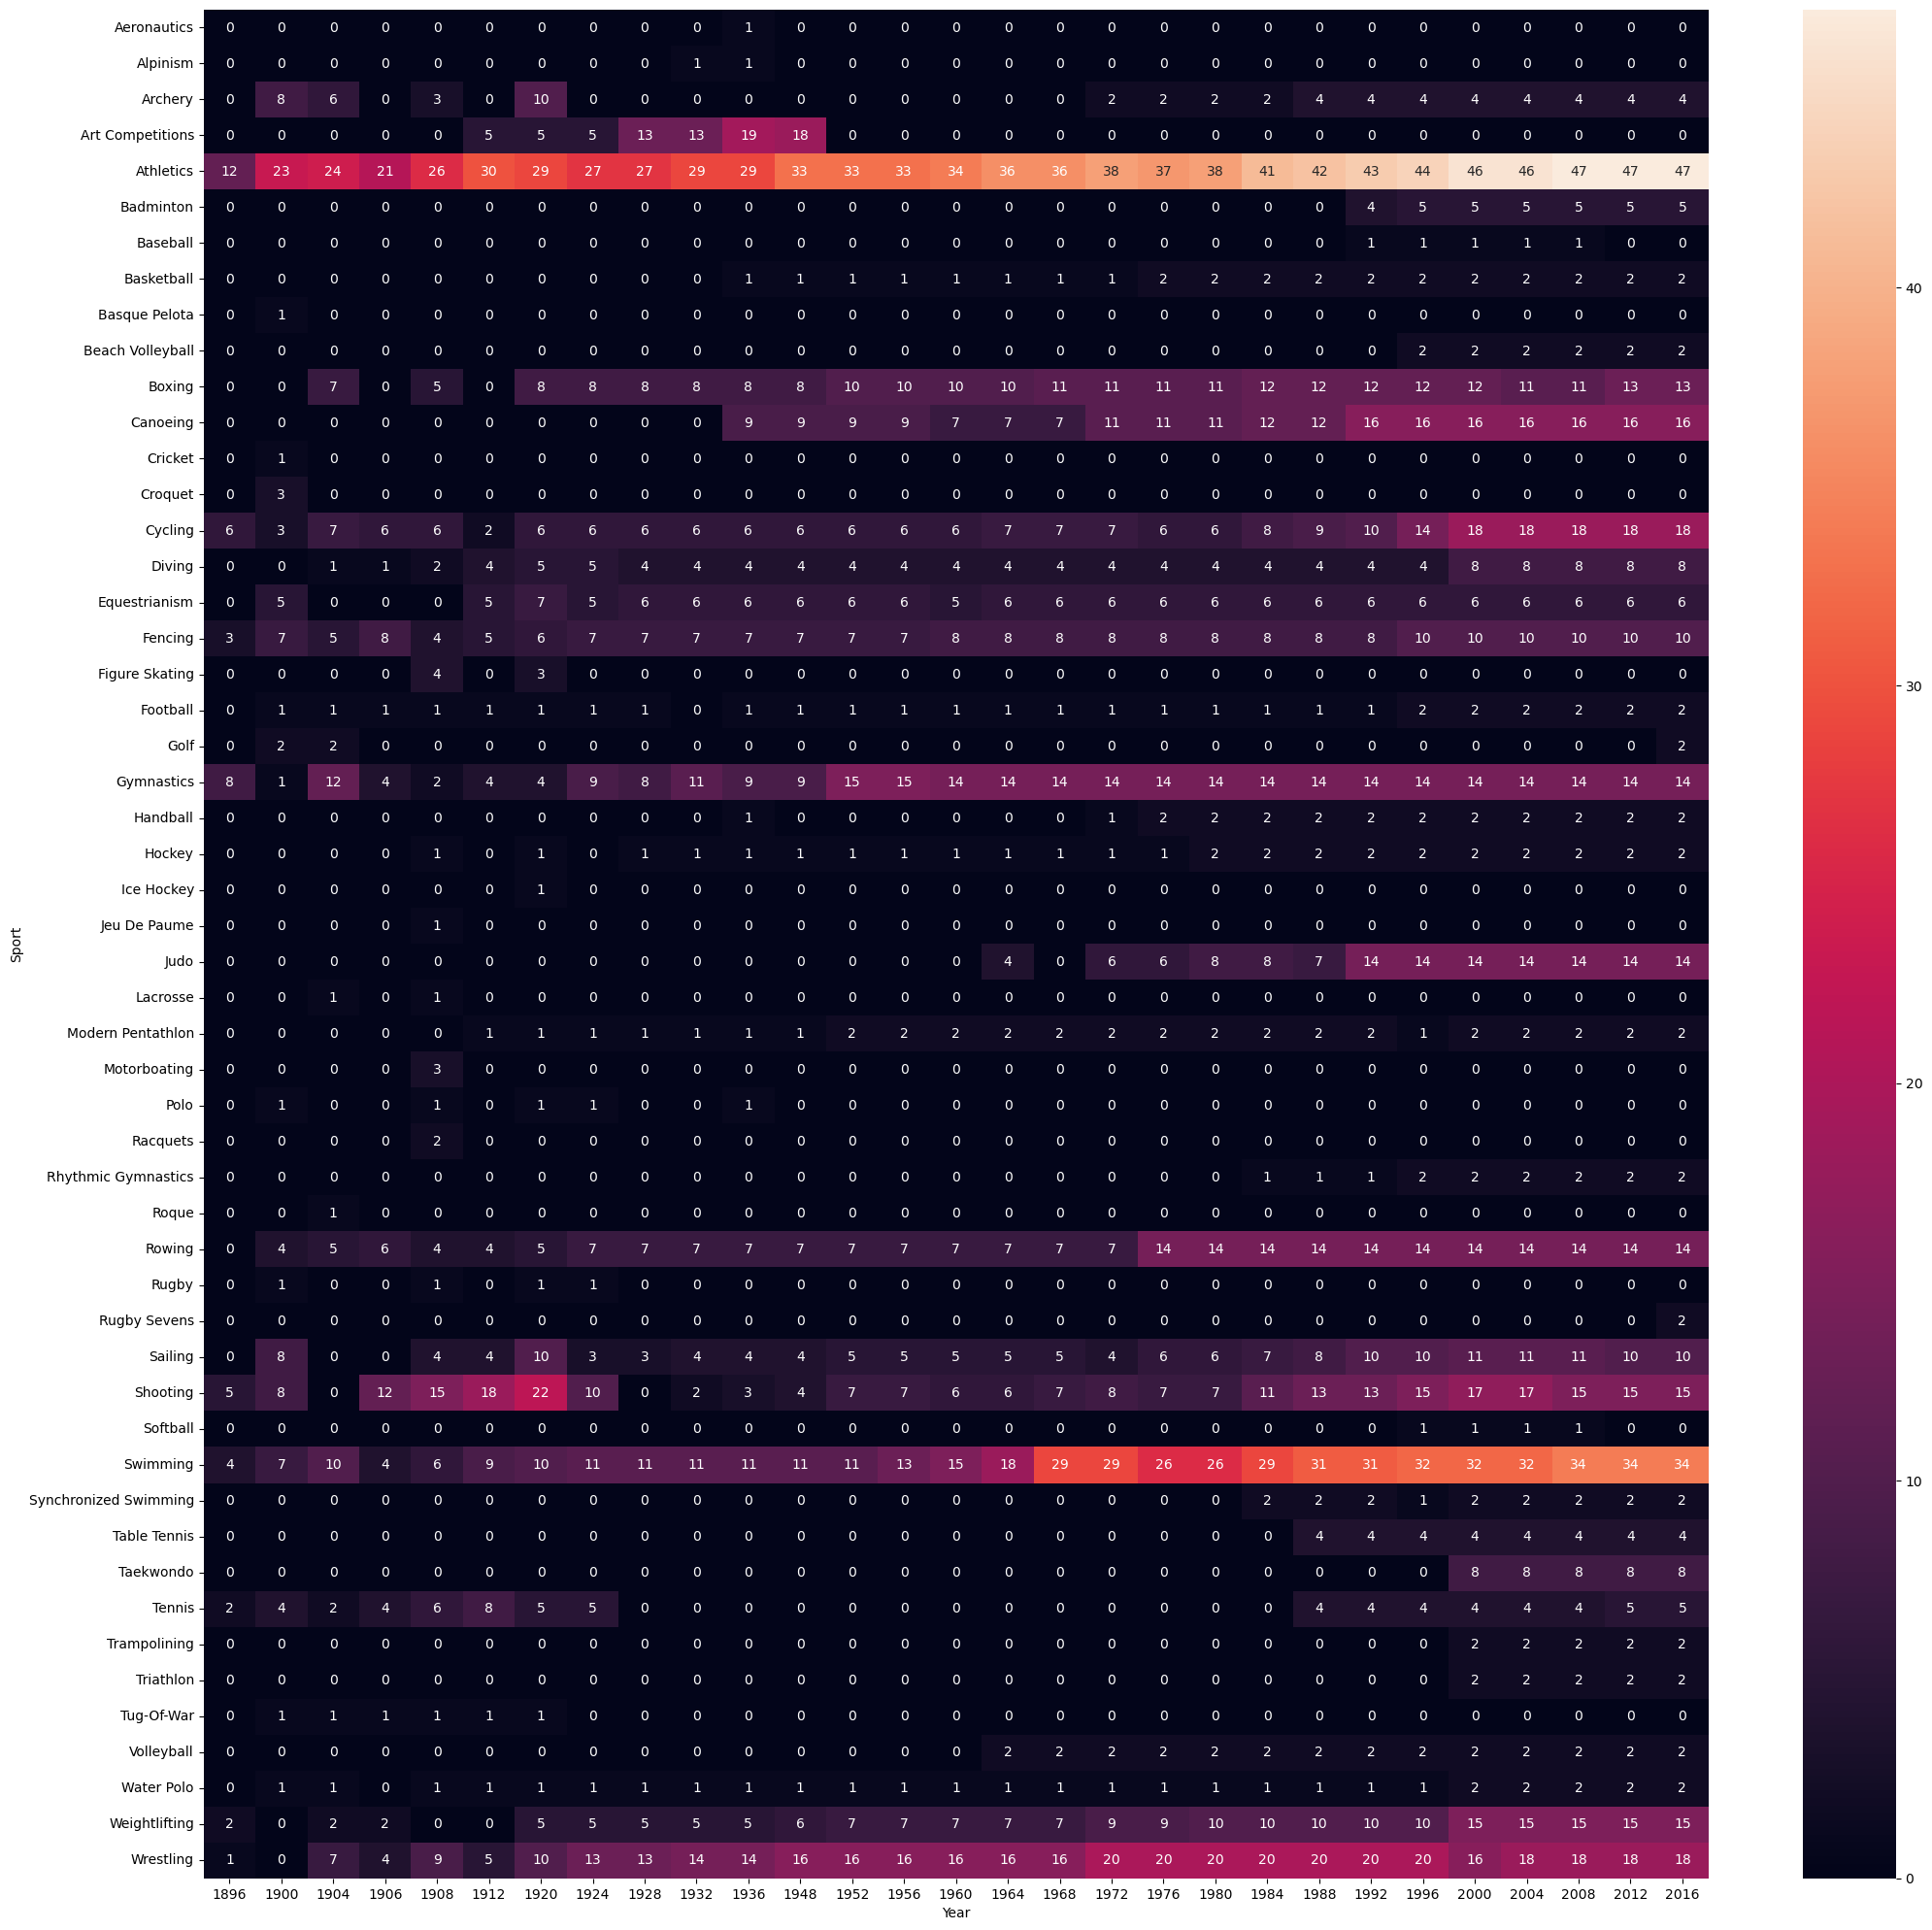

In [60]:
x = df.drop_duplicates(['Year','Sport','Event'])
plt.figure(figsize=(25,25))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

#### Top-15 Successful Athletes Game Wise

In [61]:
def most_successful(df, sport):
    temp_df = df.dropna(subset=['Medal'])

    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]

    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df, left_on='index', right_on='Name', how='left')[
        ['index', 'Name_x', 'Sport', 'region']].drop_duplicates('index')
    x.rename(columns={'index': 'Name', 'Name_x': 'Medals'}, inplace=True)
    return x

In [62]:
#In this code I have found the overall Top-15 successful athletes in the olympics

sport_list = df['Sport'].unique().tolist()
sport_list.sort()
sport_list.insert(0, 'Overall')    
x = most_successful(df,'Overall')
x = x.reset_index()
x.drop(columns=['index'], inplace=True)
x

Name  Medals       Sport  \
0                           Michael Fred Phelps, II      28    Swimming   
1                Larysa Semenivna Latynina (Diriy-)      18  Gymnastics   
2                      Nikolay Yefimovich Andrianov      15  Gymnastics   
3                       Borys Anfiyanovych Shakhlin      13  Gymnastics   
4                                       Takashi Ono      13  Gymnastics   
5                               Edoardo Mangiarotti      13     Fencing   
6              Dara Grace Torres (-Hoffman, -Minas)      12    Swimming   
7                           Aleksey Yuryevich Nemov      12  Gymnastics   
8   Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)      12    Swimming   
9                            Birgit Fischer-Schmidt      12    Canoeing   
10                               Ryan Steven Lochte      12    Swimming   
11                             Paavo Johannes Nurmi      12   Athletics   
12                                       Sawao Kato      12  Gymnastics   
13                    Natalie Anne Coughlin (-Hall)      12    Swimming   
14                   Matthew Nicholas "Matt" Biondi      11    Swimming   

     region  
0       USA  
1    Russia  
2    Russia  
3    Russia  
4     Japan  
5     Italy  
6       USA  
7    Russia  
8       USA  
9   Germany  
10      USA  
11  Finland  
12    Japan  
13      USA  
14      USA

> Below graph indicates Top-15 successful athletes overall (i.e. irrespective of the sports)

In [63]:
fig = px.bar(x, x='Name', y='Medals', color='region', color_continuous_scale='Bluered_r', labels={
        "Name": "Name of the athlete",
        "Medals": "Total medals won by the athlete",
        "region": "Country of the athlete"
    },)
fig.update_layout(template='plotly_dark',title='Top-15 Successfull athletes in the olympics',height=700)

In [66]:
# Top-15 Successful athletes in Gymnastics
y = most_successful(df,'Gymnastics')
y = y.reset_index()
y.drop(columns=['index'],inplace=True)
y

Name  Medals       Sport          region
0   Larysa Semenivna Latynina (Diriy-)      18  Gymnastics          Russia
1         Nikolay Yefimovich Andrianov      15  Gymnastics          Russia
2          Borys Anfiyanovych Shakhlin      13  Gymnastics          Russia
3                          Takashi Ono      13  Gymnastics           Japan
4                           Sawao Kato      12  Gymnastics           Japan
5              Aleksey Yuryevich Nemov      12  Gymnastics          Russia
6            Viktor Ivanovych Chukarin      11  Gymnastics          Russia
7               Vra slavsk (-Odloilov)      11  Gymnastics  Czech Republic
8            gnes Keleti-Srkny (Klein)      10  Gymnastics         Hungary
9        Vitaly Venediktovich Shcherbo      10  Gymnastics          Russia
10     Aleksandr Nikolayevich Dityatin      10  Gymnastics          Russia
11         Polina Hryhorivna Astakhova      10  Gymnastics          Russia
12                    Akinori Nakayama      10  Gymnastics           Japan
13       Nadia Elena Comneci (-Conner)       9  Gymnastics         Romania
14           Yury Yevlampiyevich Titov       9  Gymnastics          Russia

In [67]:
fig = px.bar(y, x='Name', y='Medals', color='region', color_continuous_scale='Bluered_r', labels={
        "Name": "Name of the athlete",
        "Medals": "Total medals won by the athlete",
        "region": "Country of the athlete"
    },)
fig.update_layout(template='plotly_dark',title='Top-15 Successfull athletes in Gymnastics',height=700)

## 3 - Country Wise Analysis

In [68]:
temp_df = df.dropna(subset=['Medal'])
#Removing duplicates for team sports
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)
temp_df

Name Sex   Age  Height  Weight  \
3                      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
12                     Arvo Ossian Aaltonen   M  30.0     NaN     NaN   
13                     Arvo Ossian Aaltonen   M  30.0     NaN     NaN   
15                  Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
16                  Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
...                                     ...  ..   ...     ...     ...   
222486                        Anton Zwerina   M  23.0     NaN    66.0   
222508            Claudia Antoinette Zwiers   F  22.0   181.0    78.0   
222526  Galina Ivanovna Zybina (-Fyodorova)   F  21.0   168.0    80.0   
222528  Galina Ivanovna Zybina (-Fyodorova)   F  25.0   168.0    80.0   
222530  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0    80.0   

                  Team  NOC        Games  Year  Season       City  \
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer      Paris   
12             Finland  FIN  1920 Summer  1920  Summer  Antwerpen   
13             Finland  FIN  1920 Summer  1920  Summer  Antwerpen   
15             Finland  FIN  1948 Summer  1948  Summer     London   
16             Finland  FIN  1948 Summer  1948  Summer     London   
...                ...  ...          ...   ...     ...        ...   
222486         Austria  AUT  1924 Summer  1924  Summer      Paris   
222508     Netherlands  NED  1996 Summer  1996  Summer    Atlanta   
222526    Soviet Union  URS  1952 Summer  1952  Summer   Helsinki   
222528    Soviet Union  URS  1956 Summer  1956  Summer  Melbourne   
222530    Soviet Union  URS  1964 Summer  1964  Summer      Tokyo   

                Sport                                   Event   Medal  \
3          Tug-Of-War             Tug-Of-War Men's Tug-Of-War    Gold   
12           Swimming  Swimming Men's 200 metres Breaststroke  Bronze   
13           Swimming  Swimming Men's 400 metres Breaststroke  Bronze   
15         Gymnastics  Gymnastics Men's Individual All-Around  Bronze   
16         Gymnastics        Gymnastics Men's Team All-Around    Gold   
...               ...                                     ...     ...   
222486  Weightlifting         Weightlifting Men's Lightweight  Silver   
222508           Judo               Judo Women's Middleweight  Bronze   
222526      Athletics              Athletics Women's Shot Put    Gold   
222528      Athletics              Athletics Women's Shot Put  Silver   
222530      Athletics              Athletics Women's Shot Put  Bronze   

             region notes  Bronze  Gold  Silver  
3           Denmark   NaN       0     1       0  
12          Finland   NaN       1     0       0  
13          Finland   NaN       1     0       0  
15          Finland   NaN       1     0       0  
16          Finland   NaN       0     1       0  
...             ...   ...     ...   ...     ...  
222486      Austria   NaN       0     0       1  
222508  Netherlands   NaN       1     0       0  
222526       Russia   NaN       0     1       0  
222528       Russia   NaN       0     0       1  
222530       Russia   NaN       1     0       0  

[16074 rows x 19 columns]

> In the below code snippet we are calculating the total number of medals won by the countries during each year. Below, I have computed the total medals won by USA during each year in the olympics. You can select any other country and check the values for it.

In [69]:
new_df = temp_df[temp_df['region'] == 'USA']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()
final_df

Year  Medal
0   1896     19
1   1900     54
2   1904    231
3   1906     23
4   1908     46
5   1912     63
6   1920     95
7   1924     99
8   1928     56
9   1932    110
10  1936     57
11  1948     84
12  1952     76
13  1956     74
14  1960     71
15  1964     90
16  1968    107
17  1972     94
18  1976     94
19  1984    173
20  1988     94
21  1992    108
22  1996    101
23  2000     91
24  2004    101
25  2008    110
26  2012    103
27  2016    121

In [70]:
fig = px.line(final_df,x='Year',y='Medal',labels={
    'Medal': 'Total number of medals'
})
fig.update_layout(template='plotly_dark',title='Total number of medals won by a particular country(For eg- USA) during each year')
fig.show()

#### Below, I have plotted the heatmap which indicates the number of medals won by the country in the sports which are played at olympics during every year.

<AxesSubplot:xlabel='Year', ylabel='Sport'>

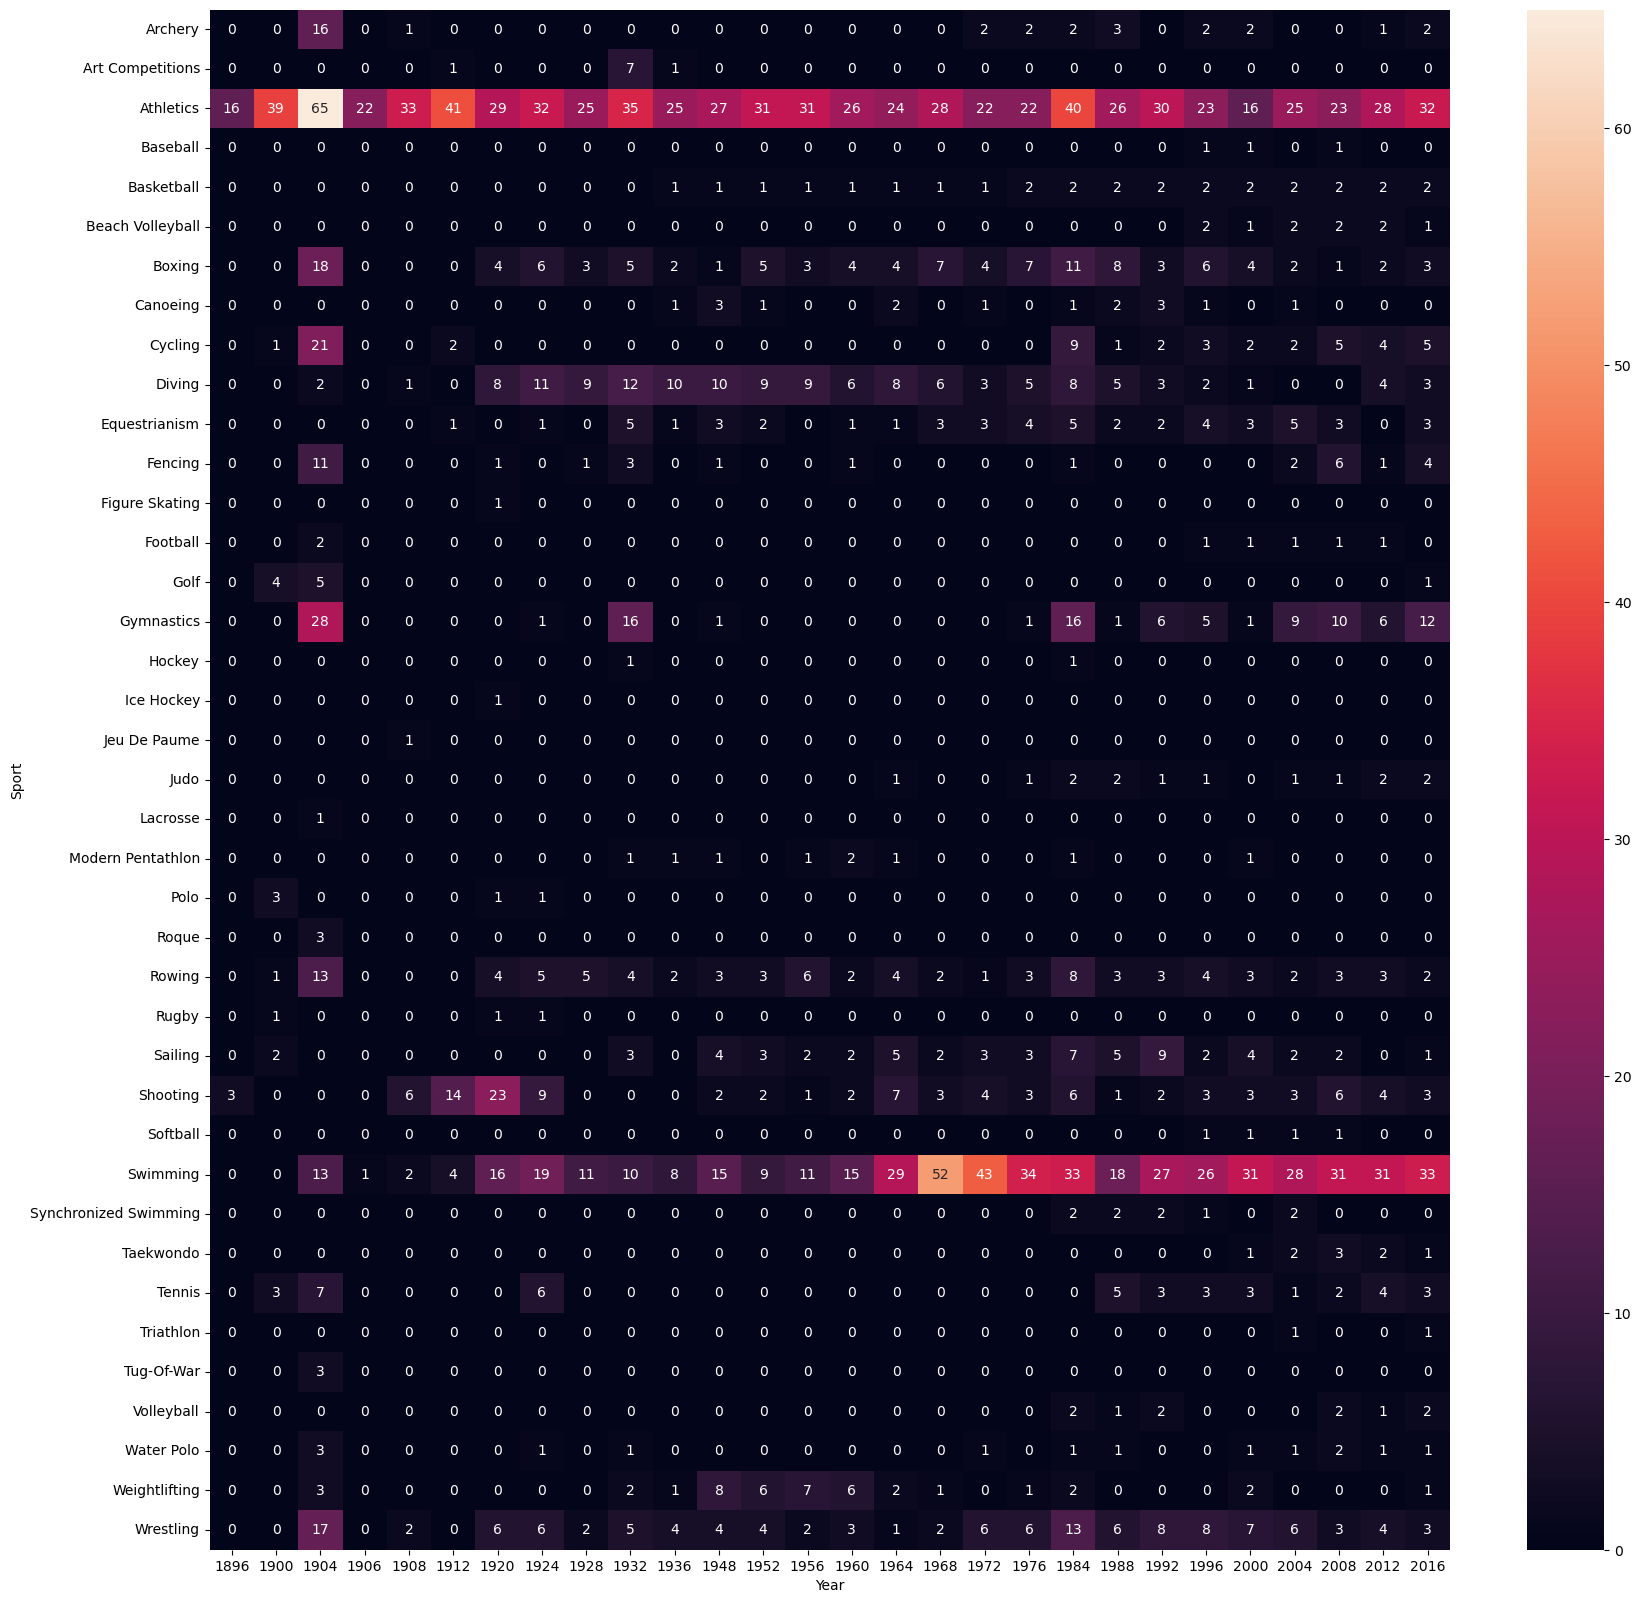

In [71]:
new_df = temp_df[temp_df['region'] == 'USA']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0).astype('int'),annot=True)

> In the above heatmap I have plotted the data for USA and it is clearly visible that USA excels in Swimming and Athletics events.

#### Now, we will check the most successful athletes of the countries.

> Below I have found the successful athletes of **Jamaica** but the function works for each and every country as the whole function is generalized for each and every country.

In [72]:
def most_successful_country_athletes(df,country):
    temp_df = df.dropna(subset=['Medal'])
    temp_df = temp_df[temp_df['region'] == country]
    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index',right_on='Name',how='left')[['index','Name_x','Sport']].drop_duplicates('index')
    x.rename(columns={'index':'Name','Name_x':'Medals'},inplace=True)
    return x

In [58]:
x = most_successful_country_athletes(df,'Jamaica')
x

Name  Medals      Sport
0           Merlene Joyce Ottey-Page       9  Athletics
19   Veronica Angella Campbell-Brown       8  Athletics
30                Usain St. Leo Bolt       8  Athletics
40           Shelly-Ann Fraser-Pryce       6  Athletics
47     Donald O'Reilly "Don" Quarrie       4  Athletics
56     Herbert Henry "Herb" McKenley       4  Athletics
62               Arthur Stanley Wint       4  Athletics
68    Novlene Hilaire Williams-Mills       4  Athletics
75                       Yohan Blake       4  Athletics
81          Sherone Anmarica Simpson       3  Athletics
88              Juliet Jean Cuthbert       3  Athletics
98                    Kerron Stewart       3  Athletics
103                  Elaine Thompson       3  Athletics
106         Shericka Nicola Williams       3  Athletics
109      Beverly McDonald (-Stewart)       3  Athletics

In [73]:
fig = px.bar(x, x='Name', y='Medals', color='Sport', color_continuous_scale='Bluered_r', labels={
        "Name": "Name of the athletes",
        "Medals": "Total medals won by the athletes",
        "Sport": "Sports played by the athletes"
    },)
fig.update_layout(template='plotly_dark',height=700,title='Topmost athletes of Jamaica')

## 4 - Athlete Wise Analysis

#### First we will calculate the distribution of the age of the athletes and will plot a histogram for the same.

In [74]:
athlete_df = df.drop_duplicates(subset=['Name','region'])
athlete_df

Name Sex   Age  Height  Weight  \
0                                A Dijiang   M  24.0   180.0    80.0   
1                                 A Lamusi   M  23.0   170.0    60.0   
2                      Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3                     Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4       Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...                                    ...  ..   ...     ...     ...   
222544           Olesya Nikolayevna Zykina   F  19.0   171.0    64.0   
222546            Fernando scar Zylberberg   M  23.0   168.0    76.0   
222548          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222551              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222544          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222546       Argentina  ARG  2000 Summer  2000  Summer          Sydney   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event   Medal  \
0       Basketball             Basketball Men's Basketball     NaN   
1             Judo            Judo Men's Extra-Lightweight     NaN   
2         Football                 Football Men's Football     NaN   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War    Gold   
4        Athletics            Athletics Women's 100 metres     NaN   
...            ...                                     ...     ...   
222544   Athletics  Athletics Women's 4 x 400 metres Relay  Bronze   
222546      Hockey                     Hockey Men's Hockey     NaN   
222548    Football                 Football Men's Football     NaN   
222549      Rowing  Rowing Men's Lightweight Coxless Fours     NaN   
222551  Basketball           Basketball Women's Basketball     NaN   

             region notes  Bronze  Gold  Silver  
0             China   NaN       0     0       0  
1             China   NaN       0     0       0  
2           Denmark   NaN       0     0       0  
3           Denmark   NaN       0     1       0  
4       Netherlands   NaN       0     0       0  
...             ...   ...     ...   ...     ...  
222544       Russia   NaN       1     0       0  
222546    Argentina   NaN       0     0       0  
222548          USA   NaN       0     0       0  
222549       Russia   NaN       0     0       0  
222551      Belarus   NaN       0     0       0  

[116885 rows x 19 columns]

In [75]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

In [76]:
fig = ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
fig.update_layout(template='plotly_dark',title='Distribution of Age')
fig.show()

#### Now we will plot a histogram for distribution of age of athlete with respect to sports and the athletes who are gold medalist in that sport

In [77]:
x = []
name = []
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                     'Swimming', 'Badminton', 'Sailing', 'Gymnastics', 'Art Competitions',
                     'Handball', 'Weightlifting', 'Wrestling', 'Water Polo', 'Hockey',
                     'Rowing', 'Fencing', 'Shooting', 'Boxing', 'Taekwondo', 'Cycling',
                     'Diving', 'Canoeing', 'Tennis', 'Golf', 'Softball', 'Archery', 'Volleyball',
                     'Synchronized Swimming', 'Table Tennis', 'Baseball', 'Rhythmic Gymnastics',
                     'Rugby Sevens', 'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']
for sport in famous_sports:
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
    name.append(sport)
fig = ff.create_distplot(x, name, show_hist=False, show_rug=False)
fig.update_layout(title='Distribution of Age wrt Sports(Gold Medalist)',template='plotly_dark')
    

#### Height vs Weight of the athletes 

<AxesSubplot:xlabel='Weight', ylabel='Height'>

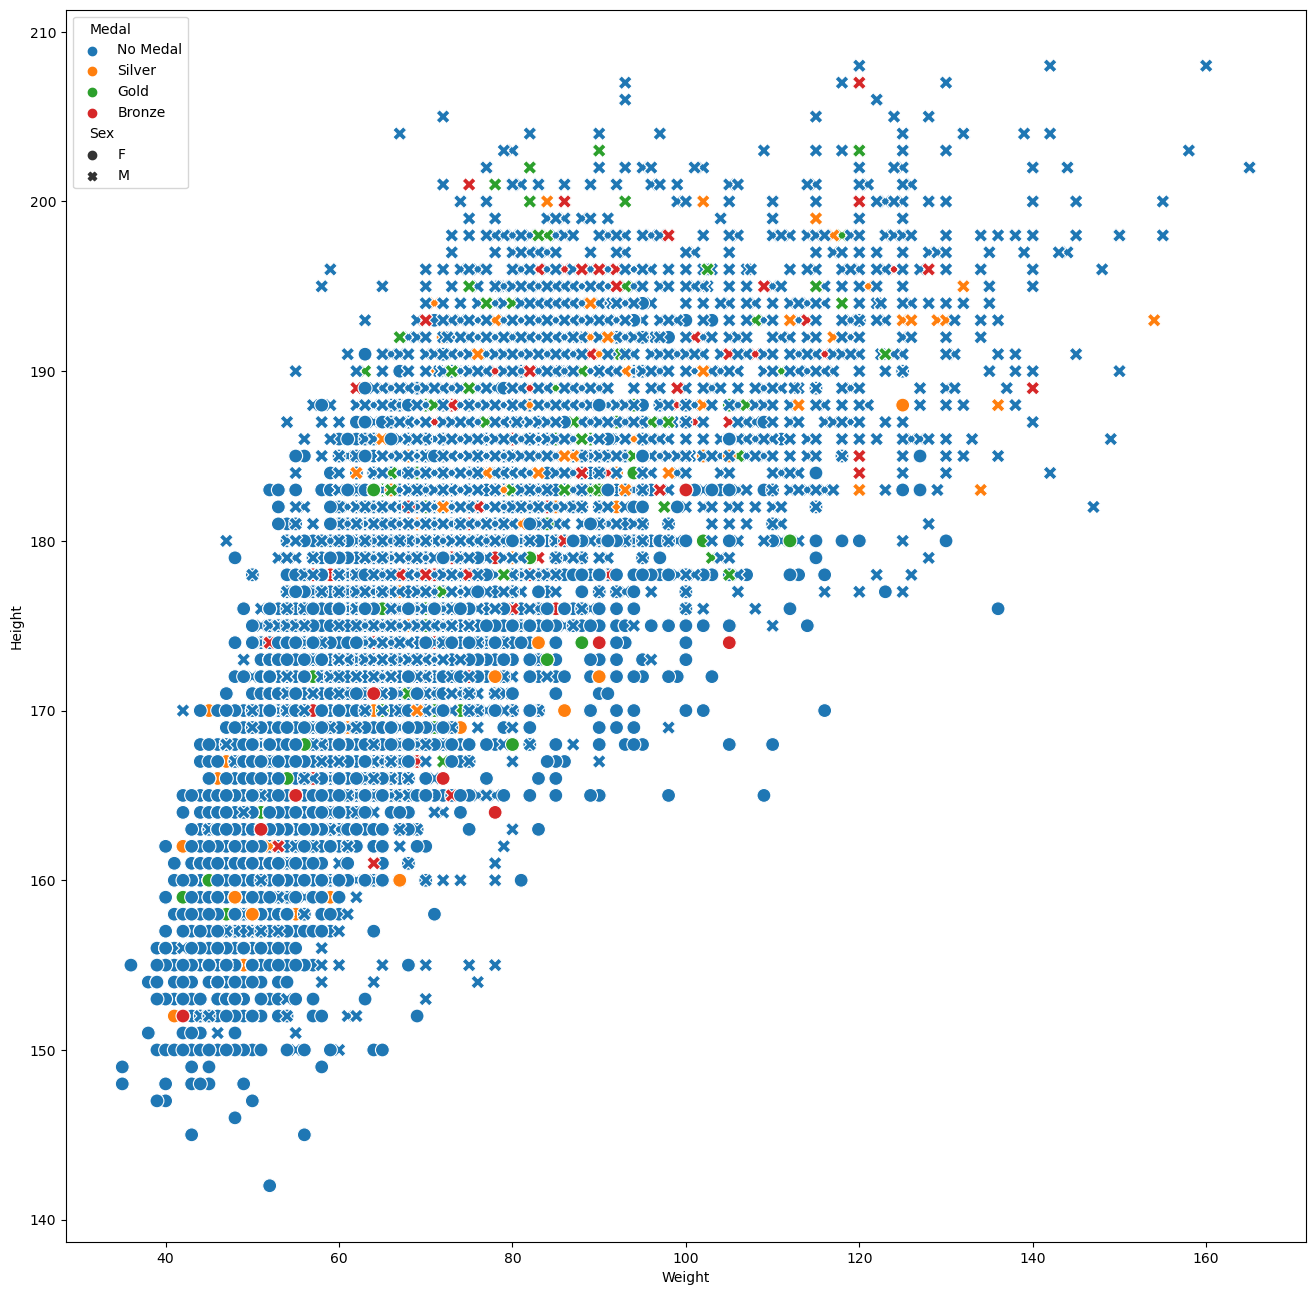

In [78]:
athlete_df['Medal'].fillna('No Medal',inplace=True)
plt.figure(figsize=(16,16))
temp_df = athlete_df[athlete_df['Sport'] == 'Athletics']
sns.scatterplot(athlete_df['Weight'],temp_df['Height'],hue=temp_df['Medal'],style=temp_df['Sex'],s=100)

#### Participation of men and women over the years

In [80]:
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [81]:
final = men.merge(women,on='Year',how='left')
final.rename(columns={'Name_x':'Male','Name_y':'Female'},inplace=True)
final = final.fillna(0)
final

Year  Male  Female
0   1896   174     0.0
1   1900  1181    23.0
2   1904   629     6.0
3   1906   759     6.0
4   1908  1772    44.0
5   1912  1978    53.0
6   1920  2280    73.0
7   1924  2535   132.0
8   1928  2342   285.0
9   1932  1382   162.0
10  1936  3539   316.0
11  1948  3629   420.0
12  1952  3468   409.0
13  1956  2193   288.0
14  1960  3755   473.0
15  1964  3290   507.0
16  1968  3555   599.0
17  1972  4552   818.0
18  1976  3320  1028.0
19  1980  3151   875.0
20  1984  4299  1368.0
21  1988  4704  1734.0
22  1992  4769  2080.0
23  1996  4811  2518.0
24  2000  4294  2790.0
25  2004  3931  2820.0
26  2008  3990  2947.0
27  2012  3679  2919.0
28  2016  4022  3209.0

In [82]:
fig = px.line(final,x='Year',y=['Male','Female'])
fig.update_layout(template='plotly_dark',title='Participation of men and women over the years')
fig.show()